In [1]:
from skimage import io
import numpy as np
from collections import deque
from skimage.color import rgb2gray
from PIL import Image, ImageOps
from icon_classify import classify_img

/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load Icon classifier components
loading pretrained models on icon data:  /home/khangln/JAIST_DRIVE/WORK/IconQA/saved_models/icon_classification_ckpt/icon_resnet101_LDAM_DRW_lr0.01_0/ckpt.epoch66_best.pth.tar


/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Finish loading Icon classifier components


In [10]:
def bfs(img, r, c):
    img[r, c] = -1
    q = deque([(r, c)])
    direction = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    top = left = right = bottom = None
    while q:
        cur_r, cur_c = q.popleft()
        for d_r, d_c in direction:
            n_r = cur_r + d_r
            n_c = cur_c + d_c
            if 0 <= n_r < img.shape[0] and 0 <= n_c < img.shape[1] and 1.0 > img[n_r, n_c] != -1:
                img[n_r, n_c] = -1
                # Update bounding box
                if top is None or top > n_r:
                    top = n_r
                if bottom is None or bottom < n_r:
                    bottom = n_r
                if left is None or left > n_c:
                    left = n_c
                if right is None or right < n_c:
                    right = n_c
                q.append((n_r, n_c))
    return top, left, bottom, right


def count_region(img):
    count = 0
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r, c] < 1.0 and img[r, c] != -1.0:
                count += 1
                bfs(img, r, c)
    return count


def extract_bbox(img):
    ret = []
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r, c] < 1.0 and img[r, c] != -1.0:
                top, left, bottom, right = bfs(img, r, c)
                ret.append((top, left, bottom, right))
    return ret

In [19]:
def classify_all_entity(img_path):
    ret = []
    img = io.imread(img_path)
    img = img[3:-3,3:-3]
    img[np.logical_and(img[:,:,0] == 178, img[:,:,1] == 235, img[:,:,2] == 255)] = [255,255,255]
    gimg = rgb2gray(img)
    bboxs =  extract_bbox(gimg)
    bboxs = [b for b in bboxs if abs(b[2]-b[0]+1)*abs(b[3]-b[1]) > 50]
    for b in bboxs:
        top, left, bottom, right = b
        pi = Image.fromarray(img[top:bottom+1,left:right+1])
        entity_class = classify_img(pi)
        ret.append(entity_class)
    return ret

In [28]:
classify_all_entity('/home/khangln/JAIST_DRIVE/WORK/IconQA/filtered_icon/icon_counting/test/choose_img/104105/image.png')

['hat', 'house', 'house', 'house']

In [14]:
pi = Image.fromarray(img[top:bottom+1,left:right+1])

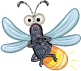

In [15]:
pi

In [18]:
classify_img(pi)

'bug'

In [9]:
img = io.imread('/home/khangln/JAIST_DRIVE/WORK/IconQA/filtered_icon/icon_counting/test/choose_img/51/choice_1.png')
img = img[3:-3,3:-3]
img[np.logical_and(img[:,:,0] == 178, img[:,:,1] == 235, img[:,:,2] == 255)] = [255,255,255]
gimg = rgb2gray(img)

In [11]:
bboxs =  extract_bbox(gimg)
bboxs = [b for b in bboxs if abs(b[2]-b[0]+1)*abs(b[3]-b[1]) > 50]

In [12]:
bboxs

[(25, 21, 95, 101), (25, 123, 95, 203)]

In [60]:
# # img = io.imread('/home/khangln/JAIST_DRIVE/WORK/IconQA/data/iconqa_data/iconqa/test/choose_img/26/image.png', as_gray=True)
# img=io.imread('/home/khangln/JAIST_DRIVE/WORK/IconQA/filtered_icon/icon_counting/test/choose_img/51/choice_1.png', as_gray=True)
# t = np.copy(img)[10:-10, 10:-10]
# bboxs =  count_region(t)

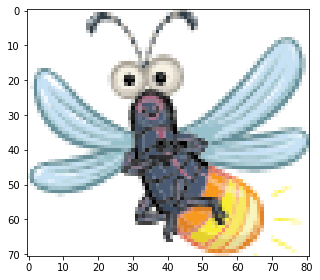

In [13]:
top, left, bottom, right = bboxs[1]
# img = io.imread('/home/khangln/JAIST_DRIVE/WORK/IconQA/data/iconqa_data/iconqa/test/choose_img/26/image.png', as_gray=True)
io.imshow(img[top:bottom+1,left:right+1])

In [71]:
rgb2gray(img[top:bottom+1,left:right+1])

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [70]:
img=io.imread('/home/khangln/JAIST_DRIVE/WORK/IconQA/filtered_icon/icon_counting/test/choose_img/51/choice_1.png', as_gray=True)


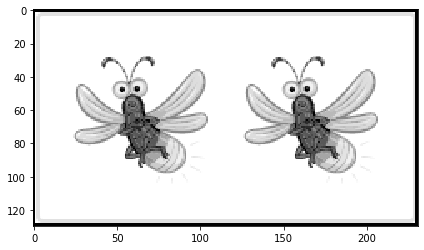

In [71]:
io.imshow(img)

In [72]:
img

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.99999994, ..., 0.96400034, 0.        ,
        0.        ],
       ...,
       [0.        , 0.99999994, 0.99999994, ..., 0.9648337 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [67]:
def count_region_of_img(img_path):
    img = io.imread(img_path, as_gray=True)
    t = np.copy(img)[10:-10, 10:-10]
    return count_region(t)

In [68]:
count_region_of_img('/home/khangln/JAIST_DRIVE/WORK/IconQA/filtered_icon/icon_counting/test/choose_img/51/choice_1.png')

1

In [69]:
img

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.99999994, ..., 0.96400034, 0.        ,
        0.        ],
       ...,
       [0.        , 0.99999994, 0.99999994, ..., 0.9648337 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [73]:
io.available_plugins

{'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'fits': ['imread', 'imread_collection'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection']}

In [1]:
from extract_entity import classify_all_entity

/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Load Icon classifier components
loading pretrained models on icon data:  /home/khangln/JAIST_DRIVE/WORK/IconQA/saved_models/icon_classification_ckpt/icon_resnet101_LDAM_DRW_lr0.01_0/ckpt.epoch66_best.pth.tar


/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/khangln/miniconda3/envs/trans/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Finish loading Icon classifier components


In [2]:
a,b = classify_all_entity('/home/khangln/JAIST_DRIVE/WORK/IconQA/data/iconqa_data/iconqa/test/choose_img/42/image.png')

In [7]:
b[7]

In [8]:
b[6].size

(16, 12)

In [3]:
a

['spoon',
 'jar',
 'clock',
 'tape',
 'shirt',
 'house',
 'house',
 'house',
 'house',
 'house',
 'car',
 'house',
 'house',
 'sign']

In [11]:
import glob
import json
from tqdm import tqdm

In [12]:
m = 0
for t in tqdm(glob.glob('/home/khangln/JAIST_DRIVE/WORK/IconQA/data/iconqa_data/iconqa/train/choose_img/*/data.json')):
    with open(t) as f:
        d = json.load(f)
        m = max(m, len(d['choices']))

100%|██████████| 34603/34603 [02:20<00:00, 245.80it/s]


In [13]:
m

5